# **5003HW5**

**Author: Li,Qichao**

**ID:20787264**

**2021,Nov**

#### **a.	Read the data from the cleaned data file using Pandas.**

In [2]:
import pandas as pd 
import numpy as np
import math
df = pd.read_csv("^HSI-cleaning.csv")

#### **b.	Extract the time series of the absolute returns from the column ‘Adj Close’**

In [3]:
P = np.array(df["Adj Close"])
ret = []
for i in range(len(P)-1):
    ret.append(abs(math.log10(P[i+1]/P[i])))
ret = np.array(ret)

#### **c.	Compute the average of the time series.**

In [4]:
T = len(ret)
ave = np.sum(ret)/T

#### **d.	Generate the series of cumulative sum, with each term subtracted by the average.**

In [5]:
x = ret-ave
X = np.array([sum(x[:i+1]) for i in range(T)])
##Xt = X[t-1]

#### **e.	Use the Sliding Window Method to create enough data**

In [6]:
step = np.arange(round(math.log10(7),2),round(math.log10(T-6),2),0.1)
t = np.int64(10**step)

#### **f.	For each segment starting at t_0, compute the root-mean-square difference between the data points and the local trend and then calculate $F(t)$.**

Here we directly use the function:

$F^2=⟨y^2 ⟩-⟨y⟩^2-(⟨xy⟩-⟨x⟩⟨y⟩)^2/(⟨x^2 ⟩-⟨x⟩^2 ).$

In [7]:
F = []
for time in t:
    total = T-time+1
    RMS = 0
    for t0 in range(total):
        x_ = np.array(range(t0,t0+time))
        y_ = X[t0:t0+time]
#         print(np.mean(y_)**2)
        a = np.var(y_)-(np.mean(x_*y_)-np.mean(x_)*np.mean(y_))**2/np.var(x_)
        RMS+=np.sqrt(a)
    F.append(RMS/total)


[0.0022734686559721246, 0.002478704549972813, 0.003016303778798728, 0.0034865005633264302, 0.003921354340566496, 0.004607974984434019, 0.005421700908546642, 0.006387379607289427, 0.007629044157850764, 0.009269150393897816, 0.011186532401305337, 0.013880483408015482, 0.017352775681466467, 0.021962601941745496, 0.027934007028676665, 0.035457891393268604, 0.044335380466512524, 0.055440965816173755, 0.06988385751696952, 0.08872693237488716, 0.11430349539326291, 0.1497093355739836, 0.19676424373095372, 0.25415271692310487, 0.32790174184180537, 0.4223984262197348, 0.5424129148497291, 0.6444146871432966, 0.6545741587961932, 0.6797816638232104, 0.7432082149472636]


#### g.  Plot $F(t)$ versus t using logarithmic scales for both axes.

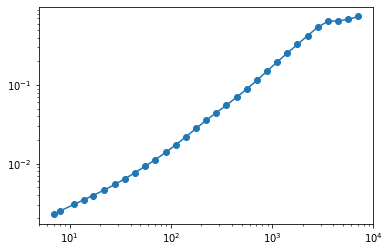

In [8]:
import matplotlib.pyplot as plt
plt.loglog(t,F,marker='o')
plt.show()

#### h. To obtain the exponent α in the relation $F(τ)∝τ^α$, discard the upper parts of the data points that deviate from the power law(because of the lack of data) and obtain the value of $α1$ for short time scale and $α2$ for long time scale seperately.

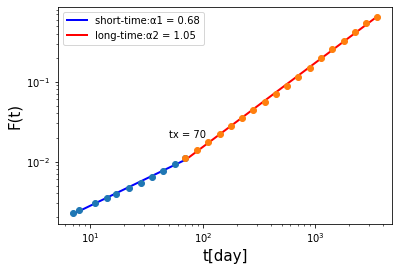

In [13]:
t1 = t[:11]
t2 = t[10:28]
F1 = F[:11]
F2 = F[10:28]
logt1 = np.log10(t1)
logt2 = np.log10(t2)
logF1 = np.log10(F1)
logF2 = np.log10(F2)
coeff1 = np.polyfit(logt1,logF1,1)
poly1 = np.poly1d(coeff1)
# print(poly1)

yfit1 = lambda x : 10**(poly1(np.log10(x)))
coeff2 = np.polyfit(logt2,logF2,1)
poly2 = np.poly1d(coeff2)
# print(poly2)

yfit2 = lambda x : 10**(poly2(np.log10(x)))
plt.loglog(t1,yfit1(t1),'-b',lw = 2,label = f"short-time:α1 = {round(coeff1[0],2)}")
plt.loglog(t2,yfit2(t2),'-r',lw = 2,label = f"long-time:α2 = {round(coeff2[0],2)}")
plt.loglog(t1,F1,t2,F2,marker= 'o',lw = 0)
plt.legend()
plt.xlabel("t[day]",fontsize = 15)
plt.ylabel("F(t)",fontsize = 15)
plt.text(50,0.02,f'tx = {t1[-1]}')
# print(t1[-1])
plt.show()

**From the plot we get above, we can find that: at short time scale(t<70days), the exponent is just 0.68 while it becomes 1.05 after that time, which indicates that the short-time and long-time behaviors of the market are different.**


However, only when t changes in minutes can we consider it has the short time scale. In this picture, we notice that the unit of t is "day", which can not be considered as a short time scale. So, we only need to calculate $\alpha$ once.

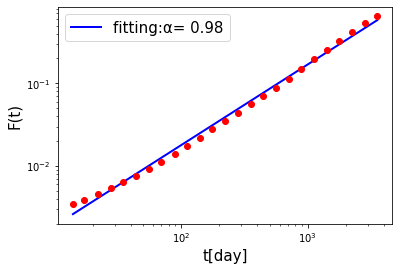

In [34]:
t3 = t[3:28]
F3 = F[3:28]
logt3 = np.log10(t3)
logF3 = np.log10(F3)
coeff3 = np.polyfit(logt3,logF3,1)
poly3 = np.poly1d(coeff3)
yfit3 = lambda x : 10**(poly3(np.log10(x)))
plt.loglog(t3,yfit3(t3),'-b',lw = 2,label = f"fitting:α= {round(coeff3[0],2)}")

plt.loglog(t3,F3,marker = "o",color = 'r',lw=0)
plt.xlabel("t[day]",fontsize = 15)
plt.ylabel("F(t)",fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

**Finally, we get the exponent of $\alpha$ = 0.98>0.5, which indicates that there are persistent long-range correlations in the time series.**